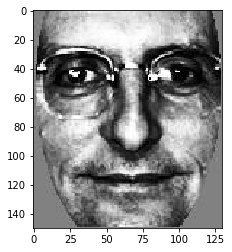

In [77]:
import os 
from os import listdir 
from os.path import isfile, join
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img
# C:\Users\Kevin\cmsc426\StarterFiles\Test1
# image = img.imread('/Users/Kevin/Test1/00001fa010.930831.jpg')
image = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg') ## Load an image as numpy array
plt.imshow(image, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()


In [78]:
# read the first 10 rows and columns of the image
image

array([[133, 124, 127, ..., 133, 129, 129],
       [131, 125, 129, ..., 125, 129, 129],
       [129, 126, 131, ..., 129, 129, 129],
       ...,
       [129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129]], dtype=uint8)

In [79]:
image[5,1]

128

In [80]:
# neutral = []

# for i in range(200):
#     i += 1
#     image = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg')
#     image = image[1:10,1:10]
#     imgage = np.array(img).flatten() # vectorization
#     neutral.append(img2)

In [81]:

# mypath = '/Users/Kevin/cmsc426/StarterFiles/Test1'

# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# images1 = np.empty(len(onlyfiles), dtype=object)
# for n in range(0,len(onlyfiles)):
#     images1[n] = cv2.imread(join(mypath,onlyfiles[n]))
    
    

In [82]:
faces_matrix = np.vstack(image)
faces_matrix.shape

(150, 130)

In [97]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape
mean_face

array([129.06      , 128.99333333, 125.5       , 125.20666667,
       117.46666667, 124.38      , 130.47333333, 116.46666667,
       110.60666667, 109.4       , 109.73333333, 110.87333333,
       109.91333333, 108.95333333, 111.02666667, 114.12666667,
       118.1       , 120.82      , 119.53333333, 119.90666667,
       125.71333333, 134.8       , 135.04666667, 141.46666667,
       143.78      , 151.10666667, 152.68      , 154.94666667,
       156.48666667, 153.8       , 153.13333333, 153.43333333,
       151.75333333, 146.14      , 144.04666667, 144.03333333,
       148.23333333, 152.3       , 150.6       , 150.92666667,
       144.69333333, 138.94      , 135.08666667, 136.09333333,
       135.96      , 133.08666667, 129.31333333, 124.92666667,
       124.8       , 127.54666667, 133.48      , 137.74      ,
       141.12666667, 136.42      , 131.26666667, 122.64      ,
       121.53333333, 120.61333333, 126.06666667, 130.02      ,
       139.17333333, 145.48      , 153.21333333, 168.08

(150, 130)

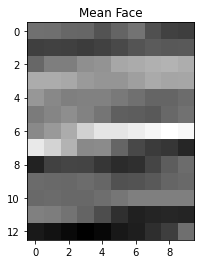

In [103]:
plt.imshow(mean_face.reshape(13,10),interpolation='nearest'); 
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape

In [90]:
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(130, 130)

In [91]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(130, 130)

Text(0.5, 0.98, 'First 10 Eigenfaces')

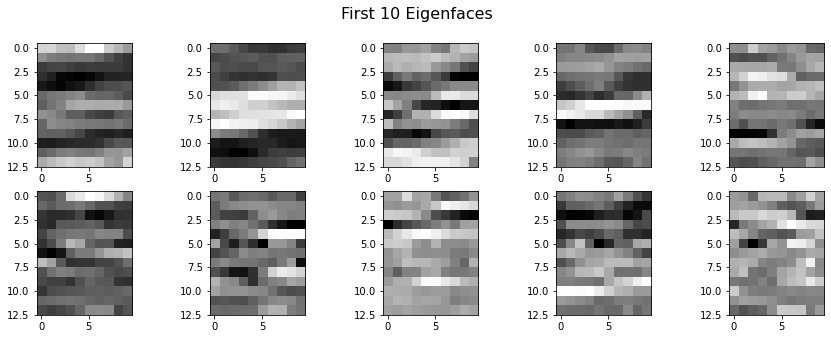

In [104]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(13,10)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

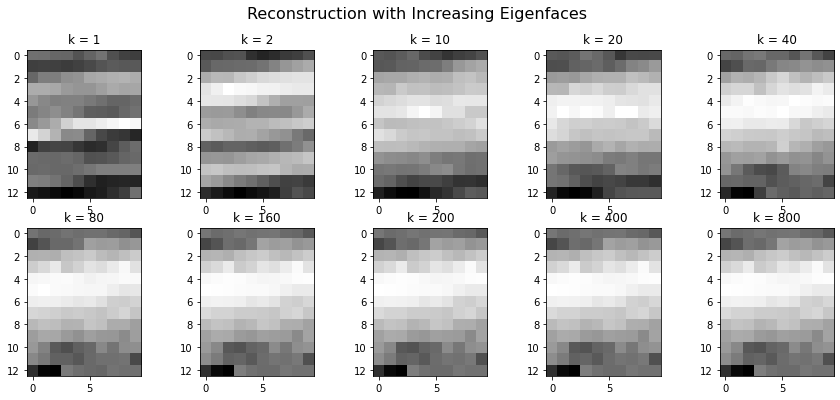

In [106]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[0,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(13,10)+mean_face.reshape(13,10),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);